# Solve ODE in Python

dy(t)/dt = -y(t) + 1; y(0) = 1

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
# function that returns dy/dt
def model(y,t):
    dydt = -y + 1.0
    return dydt

In [3]:
# initial conditions
y0 = 0

In [4]:
# time points
t = np.linspace(0, 5)

In [5]:
# solve the ODE
y = odeint(model, y0,t)

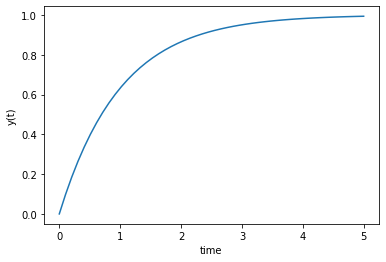

In [6]:
# plot results
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

Exercise 2: 5dy(t)/dt = -y(t) + u(t)
y(0) = 1; u steps from 0 to 2 at t = 10

In [7]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

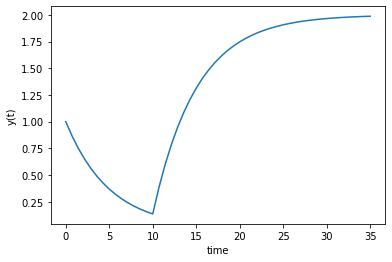

In [8]:
# function that returns dy/dt
def model(y,t):
    if(t<10):
        u = 0
    else:
        u = 2
    dydt = (-y + u)/5
    return dydt
# initial condition
y0 =1
# time points
t = np.linspace(0,35)
# solve ODE
y= odeint(model, y0,t)

# plot results
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

Exercise 3: dx(t)/dt = 3exp(-t); dy(t)/dt = 3 - y(t); x(0) = 0; y(0) = 0

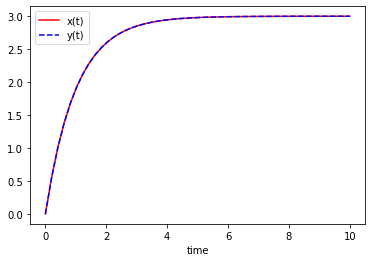

In [9]:
# function that returns dy/dt
def model(z,t):
    x = z[0]
    y = z[1]
    
    dxdt = 3*np.exp(-t) # as exp(-t) is a function, so write down t
    dydt = 3 - y
    return [dxdt, dydt]
# initial condition
z0 = [0, 0]
# time points
t = np.linspace(0,10)
# solve ODE
z= odeint(model, z0,t)
x= z[:,0]
y= z[:,1]

# plot results
plt.plot(t,x, 'r-')
plt.plot(t,y, 'b--')
plt.xlabel('time')
plt.legend(['x(t)','y(t)'])
plt.show()

Exercise 4 
2 dx(t)/dt = -x(t) + u(t)
5dy(t)/dt = -y(t) + x(t)

u = 2S(t-5), x(0)=0, y(0) =0

Where S(t-5) is a step function that changes from zero to 1 at t = 5. When it is multiplied by 2, it changes from zero to 2 at that same time, t = 5.

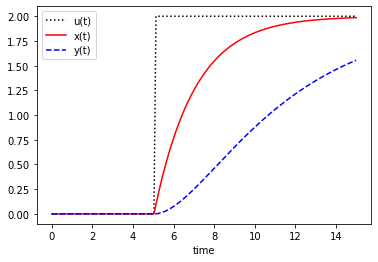

In [10]:
# function that returns dy/dt
def model(z,t,u):
    x = z[0]
    y = z[1]
    
    dxdt = (-x+u)/2 # as exp(-t) is a function, so write down t
    dydt = (-y+x)/5
    return [dxdt, dydt]
# initial condition
z0 = [0, 0]

# time points
n=150
t = np.linspace(0,15,n)
u = np.zeros(n)
u[51:]=2.0

x=np.zeros(n)
y=np.zeros(n)

# solve ODE
for i in range(1,n):
    tspan = [t[i-1],t[i]]
    z = odeint(model, z0, t, args = (u[i],))
    z0 = z[1]
    x[i] = z0[0]
    y[i] = z0[1]
    


# plot results
plt.plot(t, u, 'k:')
plt.plot(t,x, 'r-')
plt.plot(t,y, 'b--')
plt.xlabel('time')
plt.legend(['u(t)','x(t)','y(t)'])
plt.show()